# Ejemplos 
Resolución de algunos ejercicios de la práctica con Python y la librería *control*

In [ ]:
# pip install control

In [1]:
# librerías
import numpy as np
import matplotlib.pyplot as plt
# import control as co2
import control.matlab as co     # control.matlab es el módulo de compatibilidad con matlab (las funciones se llaman igual)
# from control.matlab import *  # Para usar las funciones directamente

plt.rcParams['figure.figsize'] = [23,10]
plt.rcParams['font.size'] = 24

## Ejemplo Masa-Resorte-Amortiguador

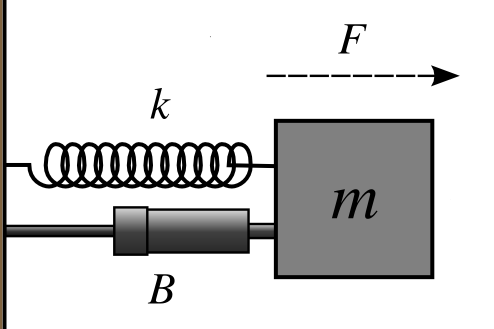

Para analizar el sistema se utiliza la ecuación que se desprende de la segunda ley de Newton:

$m\ddot{x}+b\dot{x}+kx=0$

A partir de esta ecuación es posible crear un modelo en el **espacio de estados** o un modelo en **función de transferencia**.

Si elegimos crear un modelo en el espacio de estados, se pueden definir las siguientes variables de estado:

$x_1 = x$

$x_2 = \dot{x}$

Por lo tanto, se tiene el siguiente modelo en espacio de estados:

$\dot{x}_1 = x_2$

$\dot{x}_2 = -\frac{b}{m}x_2-\frac{k}{m}x_1$

Con este sistema se pueden crear las matrices A,B,C y D.



In [5]:
# Definición de parámetros.
m = 250.0
k = 40.0
b = 60.0

# Matrices del sistema.
A = [[0,1.],[-k/m,-b/m]]
B = [[0],[1/m]]
C = [[1.,0]]

# Creación del sistema con la función ss.
sys = co.ss(A,B,C,0)

# Pasar del sistema en espacio de estados a la función de transferencia.
G   = co.ss2tf(sys)

In [4]:
# Visualizar el sistema A,B,C,D
sys

<LinearIOSystem:sys[4]:['u[0]']->['y[0]']>

In [6]:
# Visualizar la función de transferencia de ese sistema
G

TransferFunction(array([0.004]), array([1.  , 0.24, 0.16]))

In [9]:
# Crear la transferencia con la función tf
# Gg = co.tf([0.004],[1,0.24,0.16])
# Gg
# s  = co.tf('s')
# Gs = 0.05/(s**2+0.24*s+0.16)
# Gs
num = np.array([0, 0.004])
den = np.array([1, 0.24, 0.16])
# num = [0,0.004]
# den = [1,0.24,0.16]
Gn  = co.tf(num,den)

TransferFunction(array([0.05]), array([1.  , 0.24, 0.16]))

### Análisis del sistema

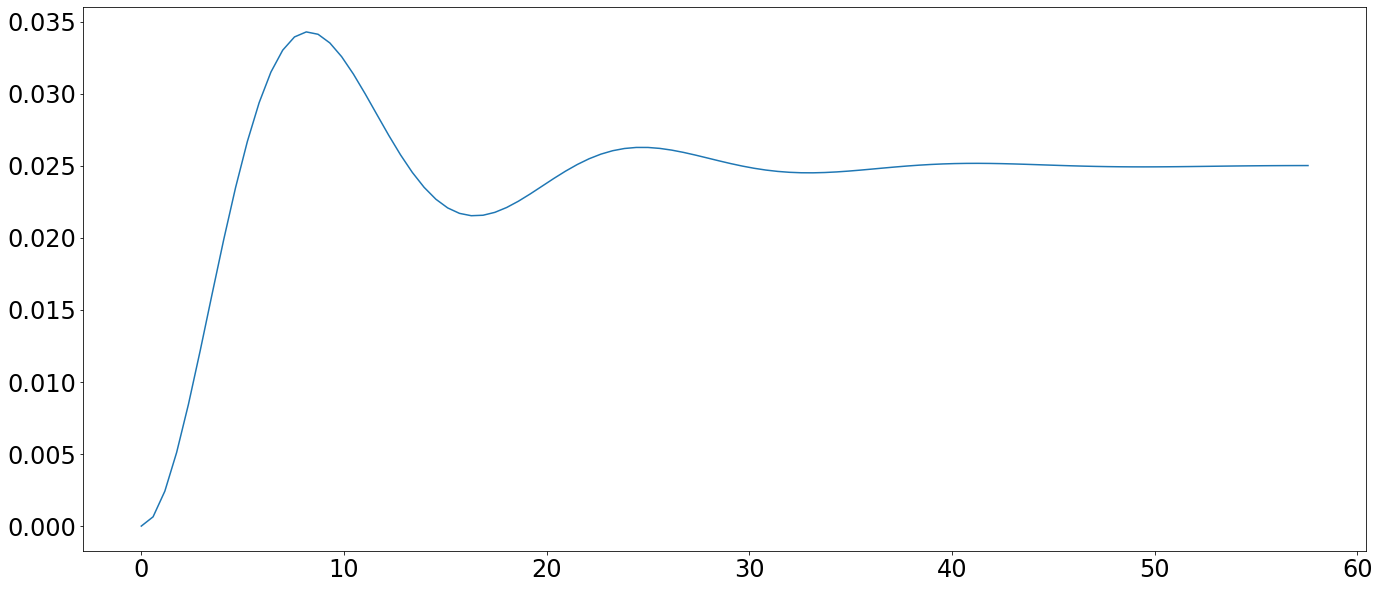

In [10]:
# Respuesta al escalón
plt.figure(1)
yout, T = co.step(G)
plt.plot(T, yout)
plt.show(block=False)

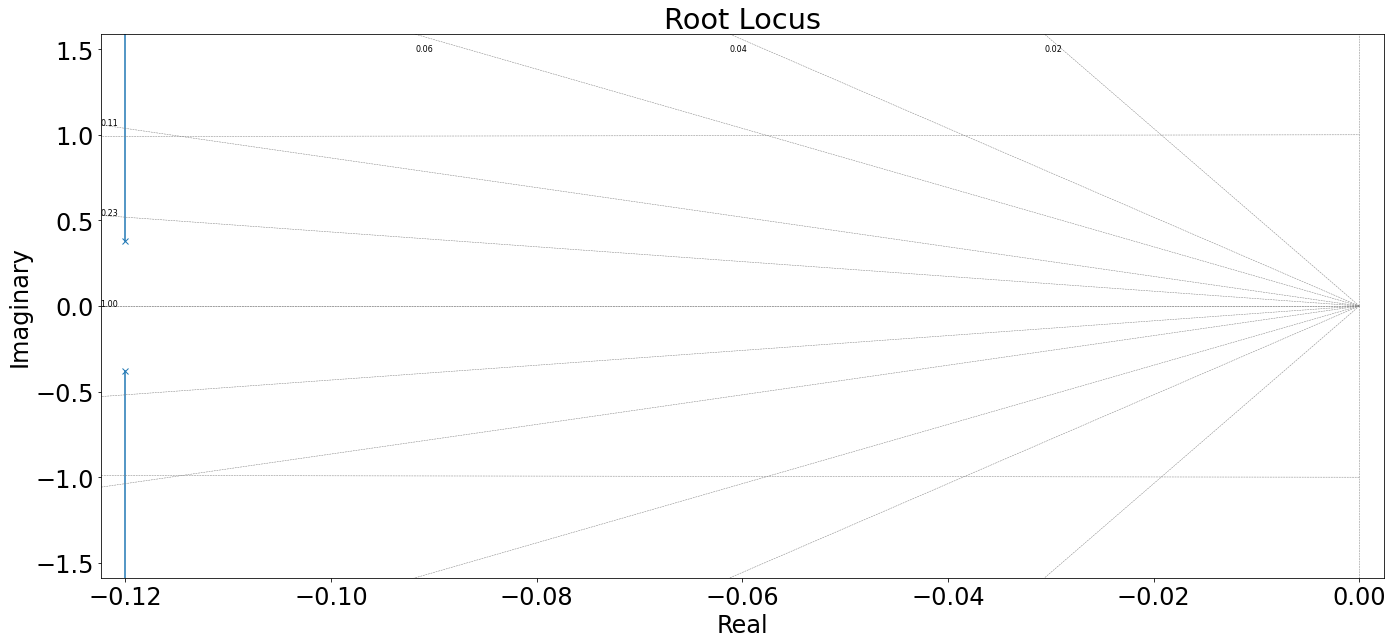

In [14]:
# Ubicación de polos y ceros del sistema
# co.pzmap(G)
rlist,k = co.rlocus(G)  # en rlist se guardan las ubicaciones de los polos
# co.rlocus(G)
# y en k las ganancias utilizadas para moverlos



In [11]:
# Ganancia en continua
co.dcgain(G)

0.024999999999999675

### Realimentación con una constante

(array([-0.12+0.43081318j, -0.12-0.43081318j]), array([], dtype=complex128))

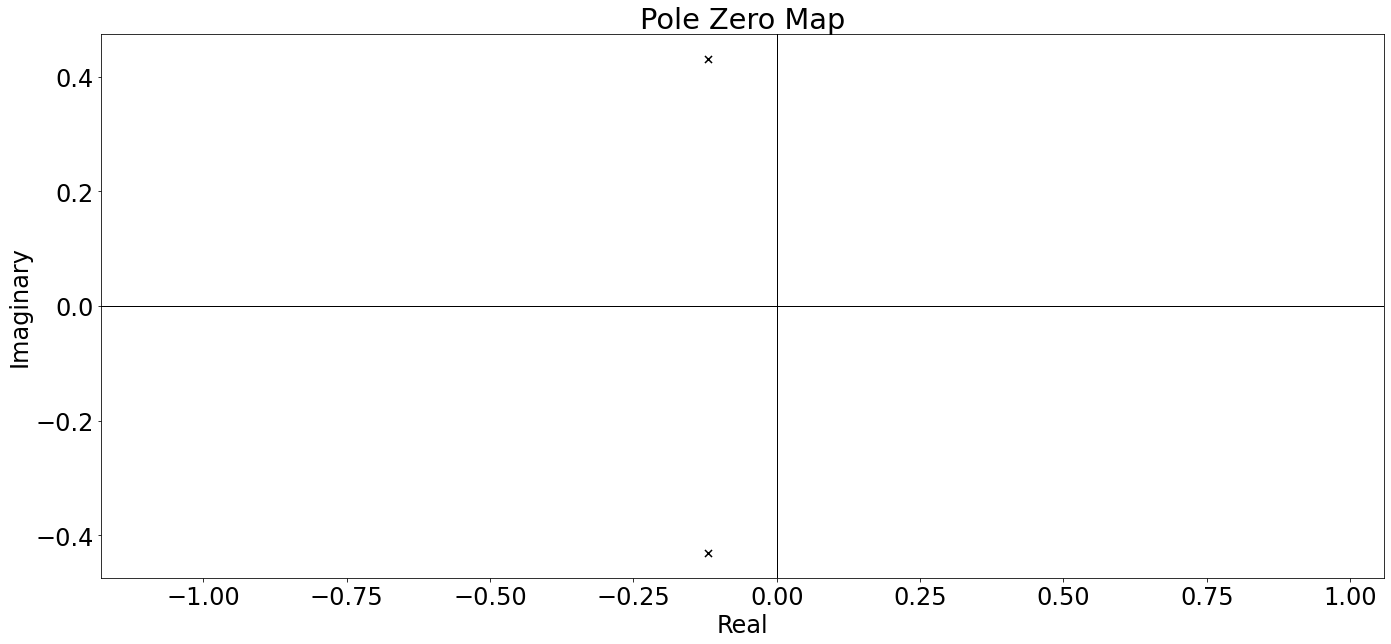

In [22]:
# Realimentación del sisetema con una ganancia K
K = 10
Glc = co.feedback(K*G,1,-1)
co.pzmap(Glc)
# co.pzmap(G)

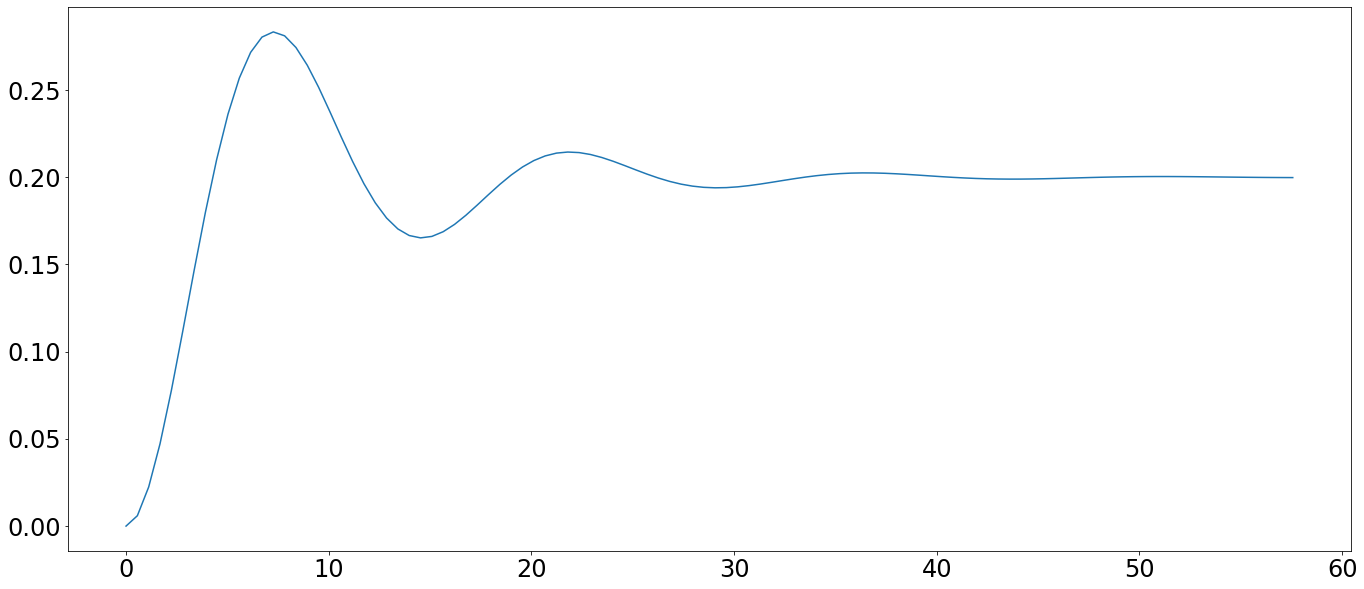

In [23]:
plt.figure(1)
yout, T = co.step(Glc)
plt.plot(T, yout)
plt.show(block=False)

In [24]:
co.dcgain(Glc)

0.19999999999999793

### Realimentación con un integrador

In [35]:
# Creamos una variable del tipo TF para poder generar funciones de transferencia.
s  = co.tf('s') 
# Agregamos un integrador con ganancia
Ki = 6
C  = Ki/s

Glc2 = co.feedback(C*G,1,-1)
# co.pzmap(Glc2)

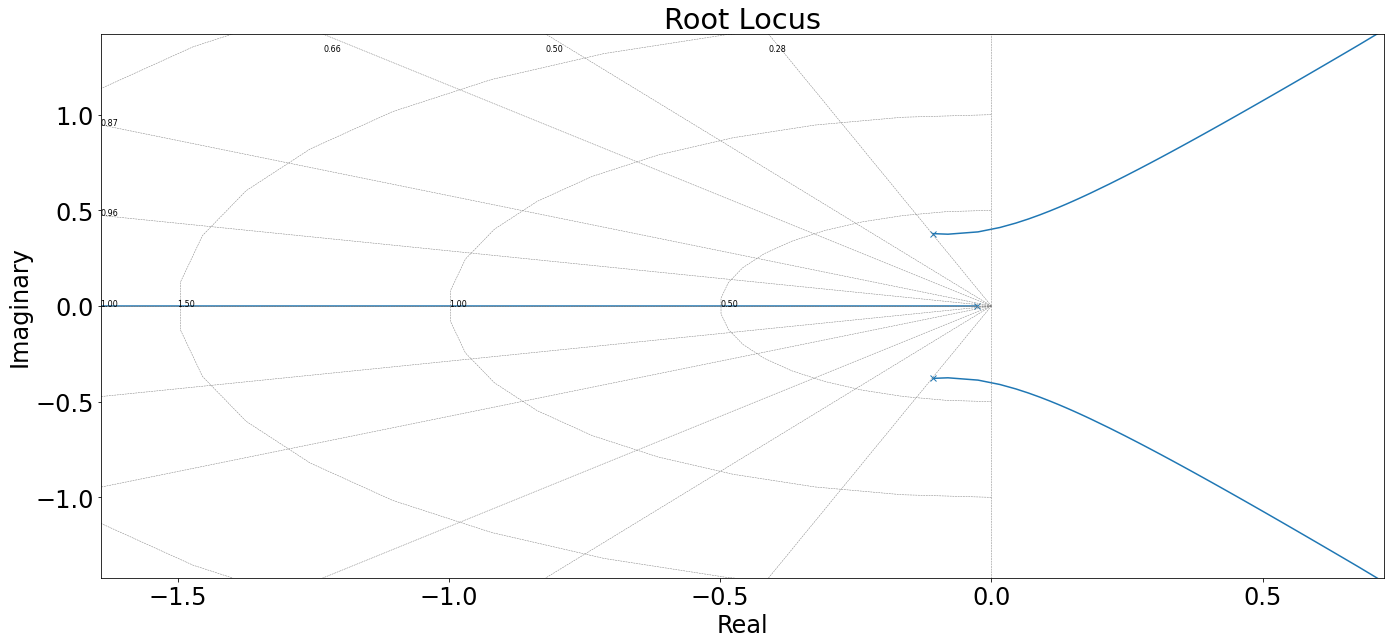

In [34]:
rlist,k = co.rlocus(Glc2)

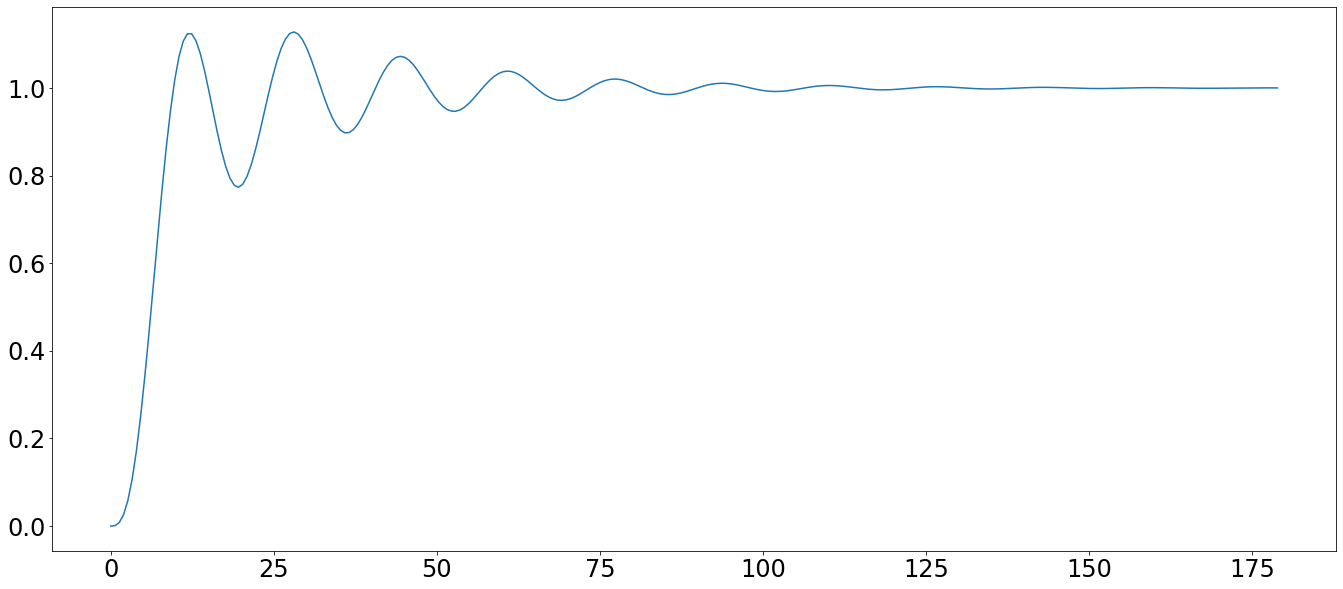

In [36]:
plt.figure(1)
yout, T = co.step(Glc2)
plt.plot(T, yout)
plt.show(block=False)

In [29]:
co.dcgain(Glc2)

1.0